# Project: Investigate a Dataset - [The Movie Database TMDB]
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 <a id='intro'></a>
## Introduction

- In this project we will analyze the data related to the movie database TMDB. 
- The database contains information about Approximately 10,000 movies information like popularity,budget,revenue,runtime,genres,production companies and more. 
- The database contains 21 columns and 10866 Rows .
- We will ask some questions to learn more information and analyzes about this data.

####  Questions like :                
- What is the distribution of the database looks like?
- What are the most profitable types of films?
- What is the most popular genres?
- How long are the most successful movies?





In [1]:
# seting up import statements for all of the packages to Use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
df.shape


(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- #### The database contains 21 columns and 10866 Rows .
- #### some columns contains null values.

<a id='wrangling'></a>
## Data Wrangling

#### In this part, We will perform some tasks to prepare the database in order to answer the required questions.
 


### Data Cleaning
- Remove unused columns.

- Remove Null value raws.

- Adjust release date column to date format.

- Adjust budget and revenue column's format.

- Putting means in place of 0 values in columns budget and revenue.

- split genres and cast columns.

In [8]:
# Remove unused columns.

df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'budget', 'revenue'],axis=1 , inplace=True)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# Remove Null value raws.
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.1+ MB


In [11]:
# Adjust release date column to date format.

df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
# Adjust budget and revenue column's format.

df['budget_adj'] = df['budget_adj'].astype(np.int64)

In [13]:
df['revenue_adj'] = df['revenue_adj'].astype(np.int64)       

In [14]:
# Putting means in place of 0 values in columns budget and revenue

df['budget_adj'] = df['budget_adj'].replace(0,df['budget_adj'].mean())

df['revenue_adj'] = df['revenue_adj'].replace(0,df['revenue_adj'].mean())

In [15]:
# split genres and cast columns.

df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['cast'] = df['cast'].apply(lambda x: x.split('|')[0])

In [16]:
# Dataframe after cleaning.

df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.0,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.0,1.385749e+09


In [17]:
# Dataframe after cleaning.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [18]:
# Dataframe after cleaning.

df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9773.000000,9.773000e+03,9.773000e+03
mean,63187.492479,0.694711,102.925509,239.298782,5.963430,2000.879362,2.886037e+07,8.636198e+07
std,90713.666750,1.036879,27.876224,602.982068,0.913179,13.036453,3.161335e+07,1.428395e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,1.000000e+00,2.000000e+00
25%,10222.000000,0.232756,90.000000,18.000000,5.400000,1994.000000,1.941707e+07,4.907360e+07
50%,18681.000000,0.419765,100.000000,46.000000,6.000000,2005.000000,1.941707e+07,5.704735e+07
75%,70577.000000,0.776380,112.000000,173.000000,6.600000,2011.000000,2.469335e+07,5.704735e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f398a482128>,
      dtype=object)

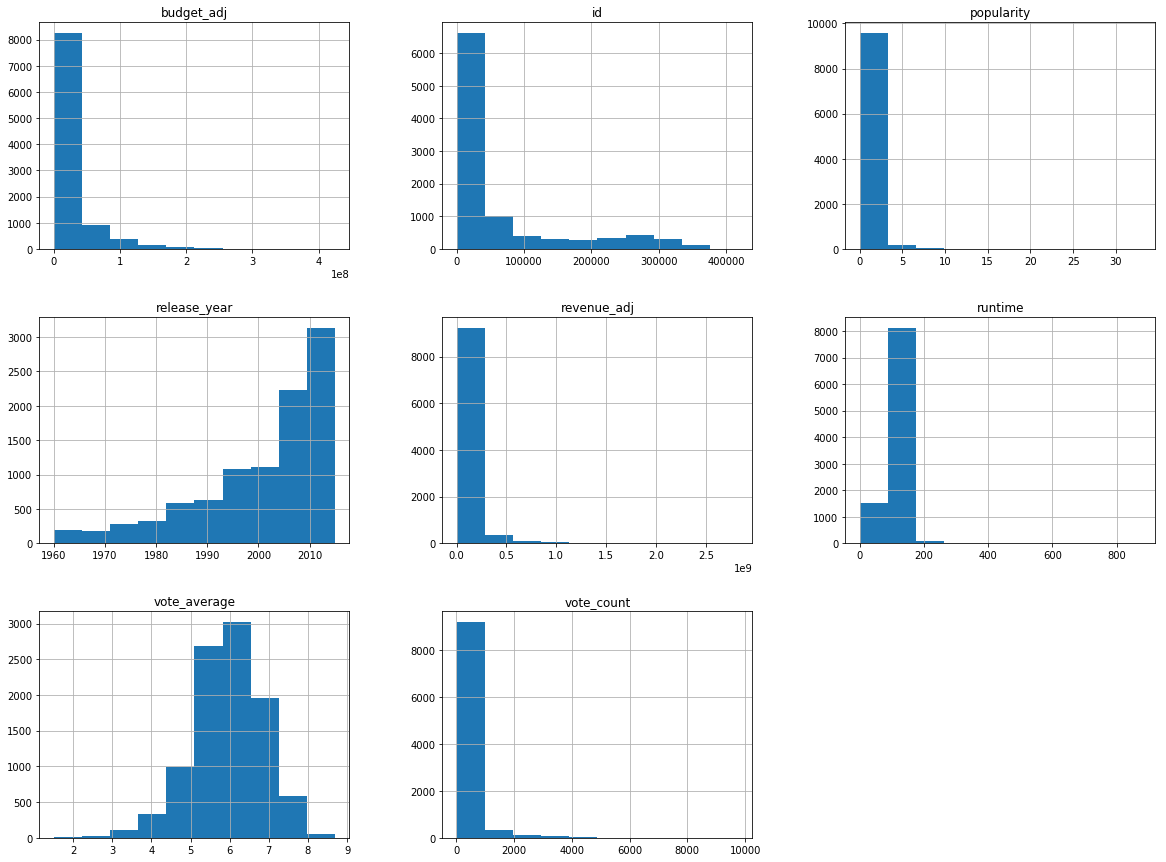

In [19]:
# Determining the distribution of the database to know what is the data set looks like.

df.hist(figsize=(20, 15))

### from the above histograms We can note the following :

- The vast majority of these films have a small production cost and a small revenue.

- Most of the films are not popular.

- Most of the films were released after 2000.

- Most of the films have avote avrage between 5 and 7 .



## Research Question 1 (What are the most profitable types of films?)
- Through this question, we can determine what are the best genres to achieve revenues.

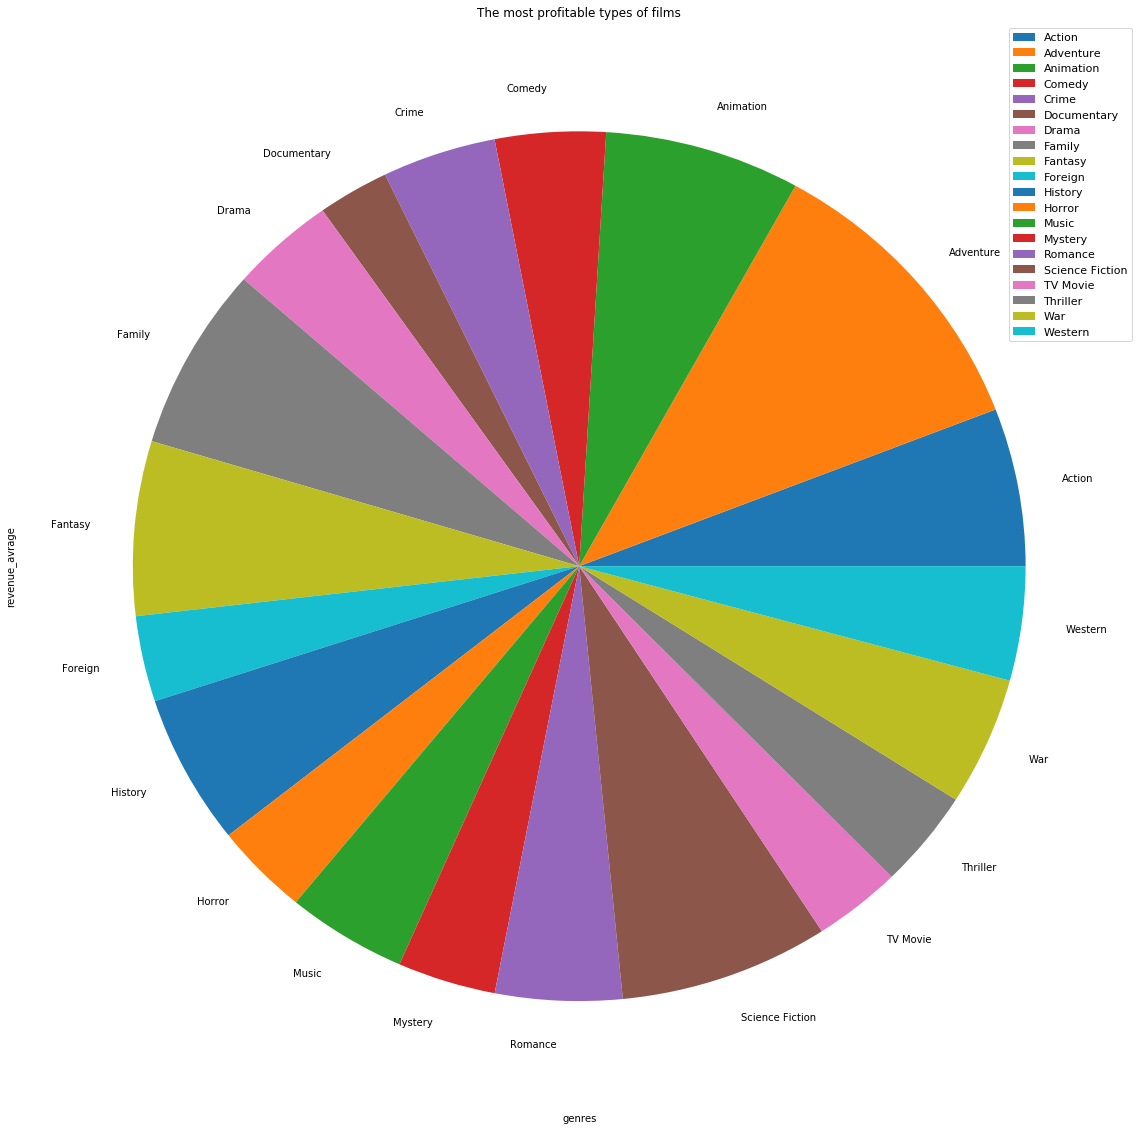

In [20]:
profitable_genres = df.groupby(['genres'])['revenue_adj'].mean()
profitable_genres.plot(kind = 'pie',figsize = (20,20))
plt.title('The most profitable types of films')
plt.xlabel('genres')
plt.ylabel('revenue_avrage')
plt.legend(prop={'size': 11})

- The figure  Shows that The most profitable types of films are adventure, then science fiction.

Text(0.5,1,'The most profitable types of films')

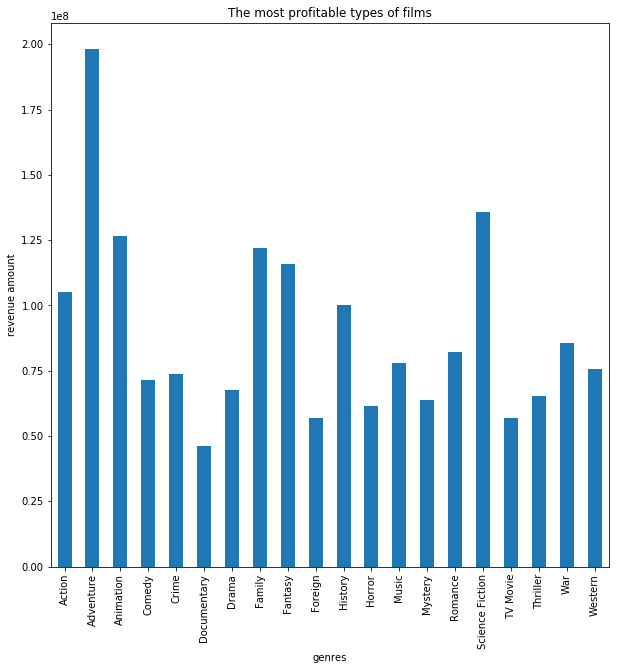

In [21]:
profitable_genres = df.groupby(['genres'])['revenue_adj'].mean()
profitable_genres.plot(kind = 'bar',figsize = (10,10))
plt.xlabel('genres')
plt.ylabel('revenue amount')
plt.title('The most profitable types of films')

- The figure  Shows that The most profitable types of films are adventure, then science fiction.

Text(0.5,1,'top movies')

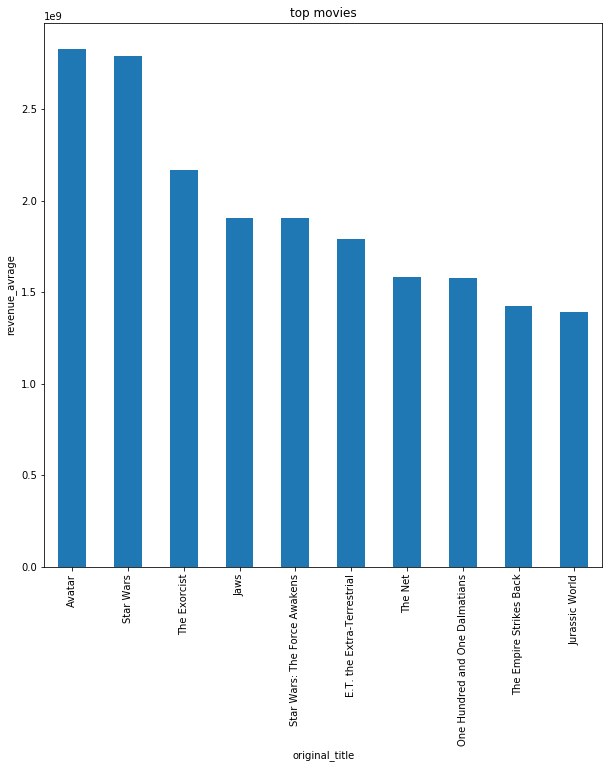

In [22]:
top_mpvies = df.groupby(['original_title'])['revenue_adj'].mean()
top_mpvies.nlargest(10).plot(kind = 'bar',figsize = (10,10))
plt.xlabel('original_title')
plt.ylabel('revenue_avrage')
plt.title('top movies')

- The figure Shows that the most profitable films are Avatar then Star Wars.

Text(0.5,1,'Vote average revenue')

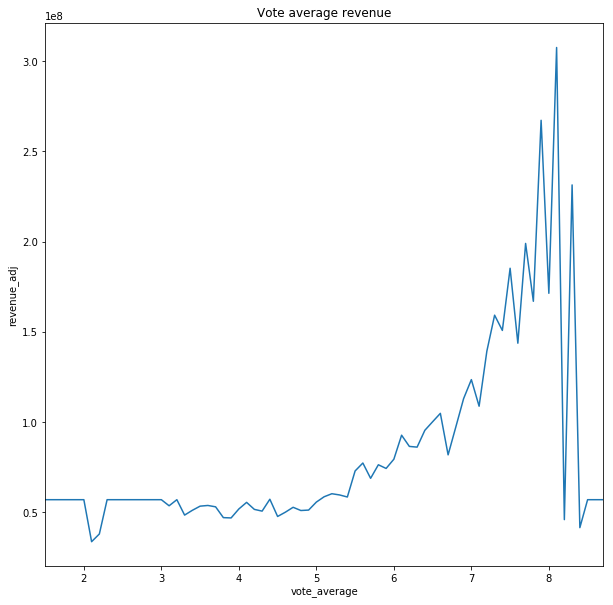

In [23]:
vote_average_revenue = df.groupby(['vote_average'])['revenue_adj'].mean()
vote_average_revenue.plot(kind = 'line',figsize = (10,10))
plt.xlabel('vote_average')
plt.ylabel('revenue_adj')
plt.title('Vote average revenue')


- The figure Shows that the best revenues has a vote average around 8.

## After conducting the previous analysis, we can note the following:

#### The most profitable types of films are adventure, then science fiction.

#### The most profitable films are Avatar then Star Wars.

#### Best revenues has a vote average around 8.

## Research Question 2 (How long are the most successful movies?)
- By answering this question, we will be able to know the length of the successful movies in achieving profits.



Text(0.5,1,'The most profitable runtime')

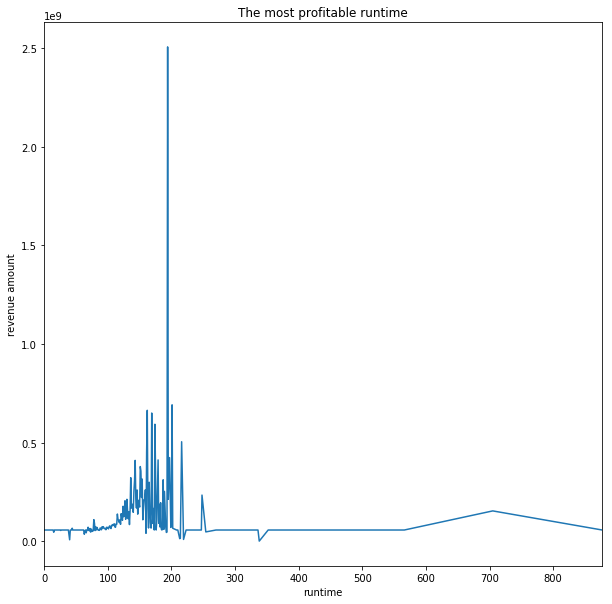

In [24]:
profitable_runtime = df.groupby(['runtime'])['revenue_adj'].mean()
profitable_runtime.plot(kind = 'line',figsize = (10,10))
plt.xlabel('runtime')
plt.ylabel('revenue amount')
plt.title('The most profitable runtime')

- The figure Shows that the most profitable movies duration is between 100 and 200 minutes.

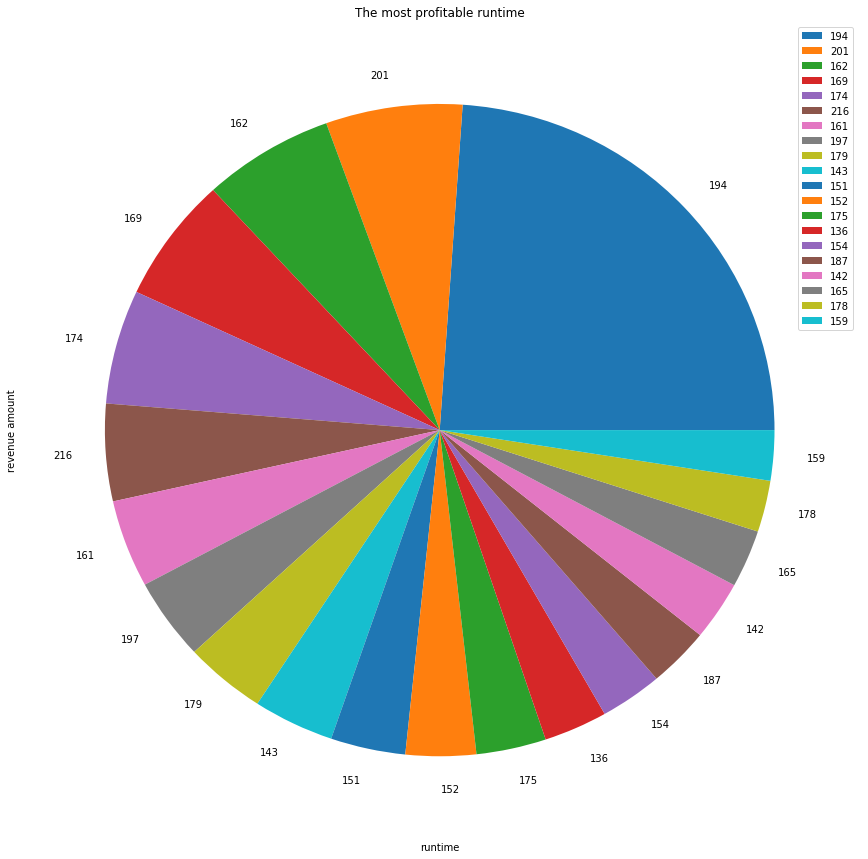

In [25]:
# top 20 profitable runtimes.

profitable_runtime = df.groupby(['runtime'])['revenue_adj'].mean()
profitable_runtime.nlargest(20).plot(kind = 'pie',figsize = (15,15))
plt.xlabel('runtime')
plt.title('The most profitable runtime')
plt.ylabel('revenue amount')
plt.legend()

-The figure Shows that the top 20 profitable movies durations are between 136 and 216.

Text(0.5,1,'Prefered durations')

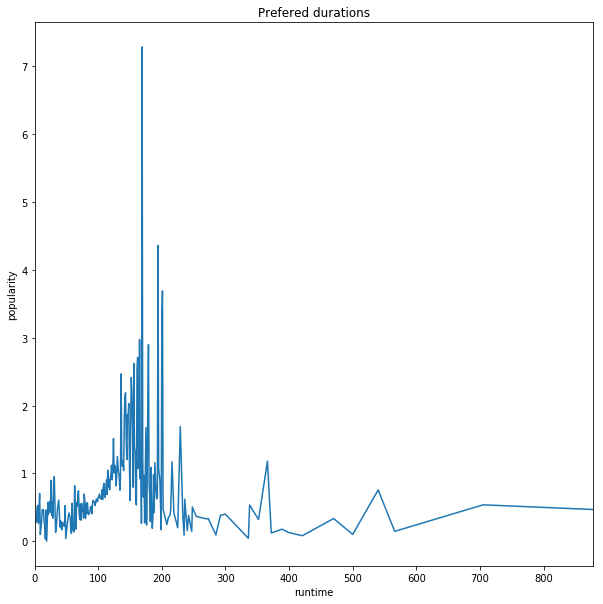

In [26]:
popular_runtime = df.groupby(['runtime'])['popularity'].mean()
popular_runtime.plot(kind = 'line',figsize = (10,10))
plt.xlabel('runtime')
plt.ylabel('popularity')
plt.title('Prefered durations')

- The figure Shows that the most popular movies duration is between 100 and 200 minutes.

## After conducting the previous analysis, we can note the following:

#### the most profitable movies duration is between 100 and 200 minutes.
#### the top 20 profitable movies durations are between 136 and 216.
#### the most popular movies duration is between 100 and 200 minutes.
- Therefore, if we want to make a profitable film, the length of the film must be between one hundred and two hundred minutes

## Research Question 3 (what is the most popular genres?)
- The answer to this question will tell us which films are the most liked by the audience.

Text(0.5,1,'prefered geners')

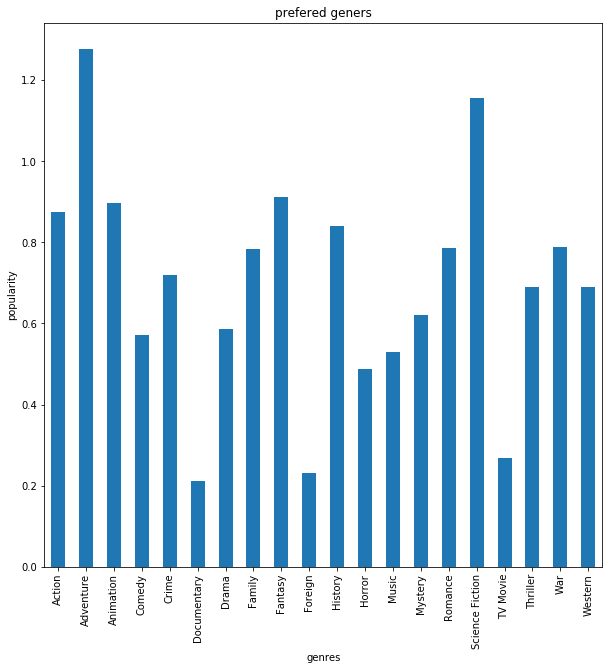

In [27]:

popular_genres = df.groupby(['genres'])['popularity'].mean()
popular_genres.plot(kind = 'bar',figsize = (10,10))
plt.xlabel('genres')
plt.ylabel('popularity')
plt.title('prefered geners')


- The figure Shows that the most popular movies are adventure v, then science fiction movies.

## After conducting the previous analysis, we can note the following:

- The most popular genre is adventure, then science fiction.

<a id='conclusions'></a>
## Conclusions



 - The vast majority of these films have a small production cost and a small revenue.

 - Most of the films are not popular.

 - Most of the films were released after 2000.

 - Most of the films have avote avrage between 5 and 7 .

 -  The most profitable types of films are adventure, then science fiction.

 -  The most profitable film is Avatar then Star Wars.

 -  Best revenues has a vote average around 8.

 -  The most profitable movie duration is between 100 and 200 minutes.

 -  The most popular movie duration is between 100 and 200 minutes.

 -  The most popular genre is adventure, then science fiction.



### Limitations

- The data set has a missing iformation so we had to remove null value raws.also we found a 0 values in columns budget and revenue,We have dealt with this situation by Putting means in place of 0 values.so we are not 100% sure about our analysis due to the missing data. 

- I've split genres and cast columns to extract a needed data so we are not sure if this affected the analysis too. 






In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0